<font size=6>
Проверка нормальности распределения

Выполнил: Шутов Захар, ММБ-002

# Введение

Цель работы: провести проверку нормальности распределения исследуемого показателя, определенного на разных генеральных совокупностях. Данные представлены в виде объедененной выборки, состоящей из четырех частей представляющих разные генеральные совокупности. Переменная-индикатор определяет, к какой части относится тот или иной элемент объединенной выборки.

Подключение библиотек

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Извлечение данных из файла

In [13]:
ds0=pd.read_excel("ML.ds2.xlsx")
ds0

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v72,v73,v74,v75,v76,v77,v78,v79,v80,G
0,6.059313,-1.855521,-17.162673,11.044343,-23.341780,-42.520243,53.133029,17.829904,15.312515,46.026926,...,18.143563,-14.173505,-12.908814,-30.324509,11.314424,35.557165,18.456091,7.427282,-30.388955,1
1,11.853664,-1.287746,-26.281267,-21.672478,0.978450,-19.722558,-45.017433,19.227115,34.183479,65.385567,...,1.447923,-4.507531,-5.578855,3.159857,30.422340,34.115070,18.175637,7.389731,-29.035627,3
2,7.770431,-6.649831,-18.138106,-9.144086,-6.882682,-50.593063,-7.432258,18.870878,32.183995,-15.468149,...,17.018063,-6.249020,-21.093471,-11.894213,30.611333,-9.326853,11.518727,39.650201,-28.201074,3
3,9.634201,18.295676,-1.251677,-5.454505,-10.419025,-15.419516,3.636486,14.139482,19.376166,-1.363523,...,5.788373,13.385526,-0.883430,-28.111708,7.078885,24.275838,23.820348,-2.653444,-26.810639,1
4,9.693239,-2.421079,-10.350603,-9.555780,14.607057,13.658101,-8.667340,20.476363,27.179034,42.885804,...,4.913177,-16.022962,-20.864255,-17.932962,20.897679,-5.641990,7.759069,-1.067956,-24.843948,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,13.093231,-3.841812,-31.574344,-19.366295,12.349862,-8.109772,-38.098884,12.164525,9.914687,37.743749,...,8.203809,3.948609,-19.115411,19.979700,25.287128,15.830407,20.846346,22.376578,76.898678,1
1396,12.142872,12.482686,3.818097,-9.440888,-27.774032,-47.837485,-8.322664,-1.228660,32.247943,31.930054,...,9.636445,-14.281234,-9.964427,8.848576,45.356607,11.322087,-9.787732,4.541500,79.154225,1
1397,4.644531,9.041294,5.761300,-19.282417,-2.181760,-59.122741,-37.847250,25.224062,-26.323112,36.524298,...,-4.145583,-26.408232,-15.694540,-12.970088,15.757011,40.161573,42.421629,42.952213,85.032471,1
1398,9.363536,12.533379,-6.838237,-30.175139,-29.440737,-28.805840,-70.525417,-3.745504,49.071180,17.408084,...,0.151256,-12.667154,0.781810,-22.384279,11.230092,27.710772,14.908584,26.325615,88.166954,1


Вывод таблицы соответствующего варианата

In [14]:
ds=ds0[['v19','G']].rename({'v19':'s19', 'G':'FACTOR'}, axis=1)
ds

,s19,FACTOR
0,1.755991,1
1,7.389731,3
2,39.650201,3
3,25.622485,1
4,11.974096,1
...,...,...
1395,-19.861516,1
1396,33.227145,1
1397,36.141951,1
1398,17.242645,1


Из объедененной выборки выделим 4 независимые выборки в соответветсвии с уровнями FACTOR.

In [15]:
sample1 = ds.s19[ds.FACTOR == 1]
sample1

0        1.755991
3       25.622485
4       11.974096
6       33.567387
10      25.085587
          ...    
1393    20.506714
1395   -19.861516
1396    33.227145
1397    36.141951
1398    17.242645
Name: s19, Length: 350, dtype: float64

In [16]:
sample2 = ds.s19[ds.FACTOR == 2]
sample2

7       19.086623
29       9.029448
30      23.404313
31      10.875438
32      31.286357
          ...    
1381     7.575029
1385    10.850574
1388    28.129365
1391    38.241587
1392    33.075442
Name: s19, Length: 350, dtype: float64

In [17]:
sample3 = ds.s19[ds.FACTOR == 3]
sample3

1        7.389731
2       39.650201
5       15.389578
8       19.492144
9        7.723220
          ...    
1384    12.860819
1389    -0.633752
1390     8.152888
1394    13.435267
1399    21.427884
Name: s19, Length: 350, dtype: float64

In [18]:
sample4 = ds.s19[ds.FACTOR == 4]
sample4

169     23.737754
171     15.916166
174     28.058260
175     32.019868
176     25.025025
          ...    
1225    34.919431
1229    10.057527
1230    31.768090
1235    24.247719
1239    11.515091
Name: s19, Length: 350, dtype: float64

# Визуализация данных

Для каждой из четырех выборок с помощью гистограммы и квантильного графика  проанализируем, можно ли использовать нормальное распределение для описания исследуемого показателя, определенного на соответствующей генеральной совокупности. Номер выборки будет означать номер генеральной совокупности, откуда взята эта выборка.

## Выборка 1

Построим гистограмму с наложенной на нее кривой нормального распределения.

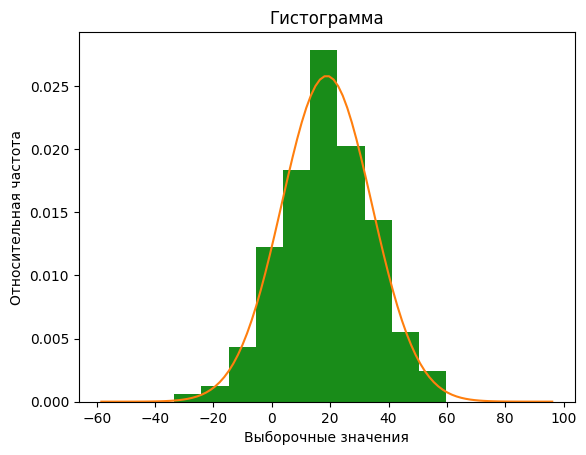

In [19]:
plt.hist(sample1, density = True, facecolor = 'green', alpha = 0.9)
plt.title("Гистограмма")
plt.ylabel("Относительная частота")
plt.xlabel("Выборочные значения")
x = np.linspace(np.mean(sample1) - 5*np.std(sample1), np.mean(sample1) + 5*np.std(sample1), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sample1), np.std(sample1)))

Эмперическая функция плотности близка к функции плотности нормального распределения. Следовательно, нормальное распределение подходит для описания исследуемого показателя первой генеральной совокупности.

Построим квантильный график.

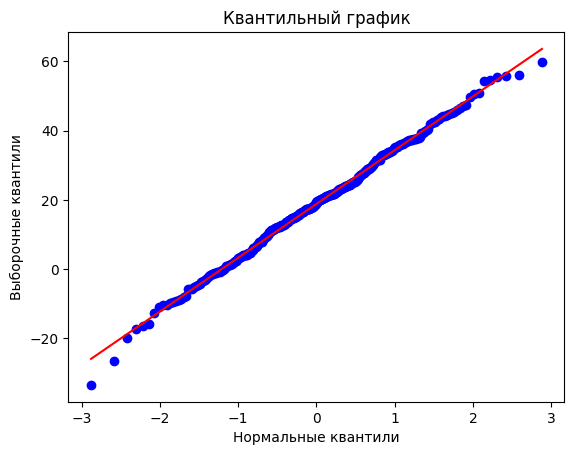

In [20]:
res = stats.probplot(sample1, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Выборочные квантили")
plt.xlabel("Нормальные квантили")
plt.show()

Большая часть выборочных квантилей расположена близко к соответствующим квантилям нормального распределения. Следовательно, нормальное распределение подходит для описания исследуемого показателя первой генеральной совокупности.

Анализ диаграмм показал, что нормальное распределение подходит для описания исследуемого показателя первой генеральной совокупности.

---



## Выборка 2

Построим гистограмму с наложенной на нее кривой нормального распределения.

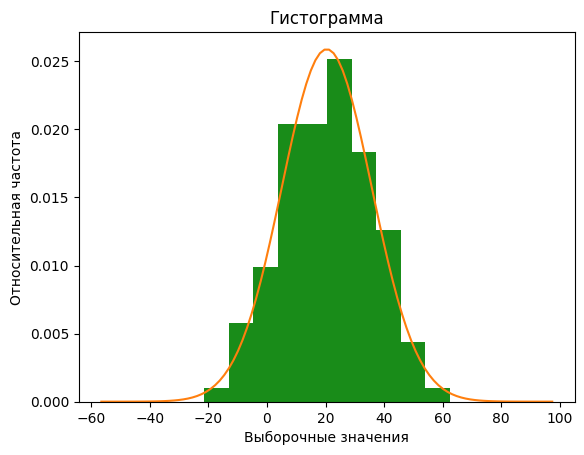

In [21]:
plt.hist(sample2, density = True, facecolor = 'green', alpha = 0.9)
plt.title("Гистограмма")
plt.ylabel("Относительная частота")
plt.xlabel("Выборочные значения")
x = np.linspace(np.mean(sample2) - 5*np.std(sample2), np.mean(sample2) + 5*np.std(sample2), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sample2), np.std(sample2)))

Эмперическая функция плотности близка к функции плотности нормального распределения. Следовательно, нормальное распределение подходит для описания исследуемого показателя второй генеральной совокупности.

Построим квантильный график.

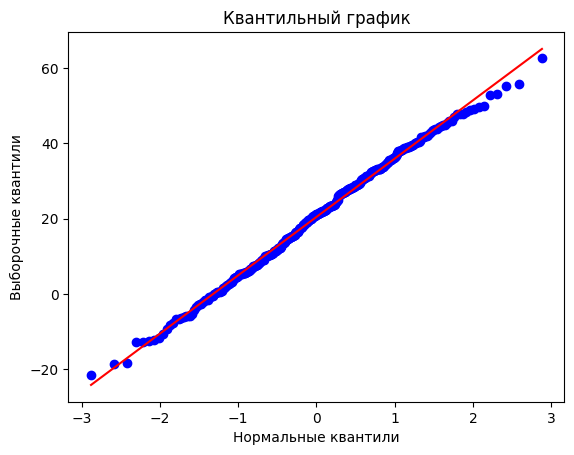

In [22]:
res = stats.probplot(sample2, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Выборочные квантили")
plt.xlabel("Нормальные квантили")
plt.show()

Большая часть выборочных квантилей расположена близко к соответствующим квантилям нормального распределения. Следовательно, нормальное распределение подходит для описания исследуемого показателя второй генеральной совокупности.

Анализ диаграмм показал, что нормальное распределение подходит для описания исследуемого показателя второй генеральной совокупности.

## Выборка 3

Построим гистограмму с наложенной на нее кривой нормального распределения.

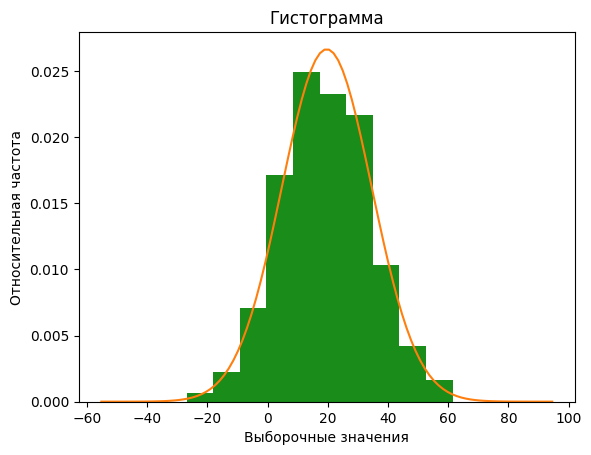

In [23]:
plt.hist(sample3, density = True, facecolor = 'green', alpha = 0.9)
plt.title("Гистограмма")
plt.ylabel("Относительная частота")
plt.xlabel("Выборочные значения")
x = np.linspace(np.mean(sample3) - 5*np.std(sample3), np.mean(sample3) + 5*np.std(sample3), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sample3), np.std(sample3)))

Эмперическая функция плотности близка к функции плотности нормального распределения. Следовательно, нормальное распределение подходит для описания исследуемого показателя третьей генеральной совокупности.

Построим квантильный график.

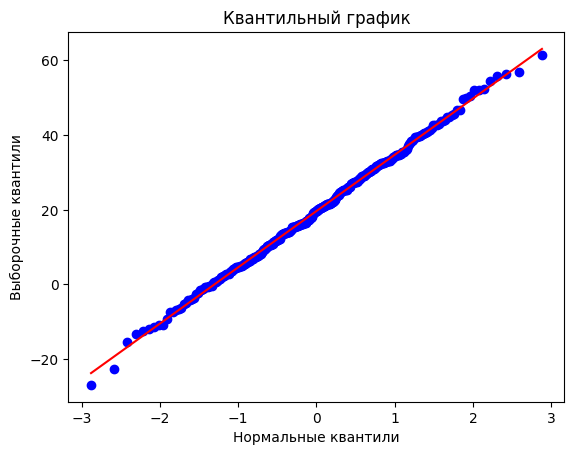

In [24]:
res = stats.probplot(sample3, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Выборочные квантили")
plt.xlabel("Нормальные квантили")
plt.show()

Большая часть выборочных квантилей расположена близко к соответствующим квантилям нормального распределения. Следовательно, нормальное распределение подходит для описания исследуемого показателя третьей генеральной совокупности.

Анализ диаграмм показал, что нормальное распределение подходит для описания исследуемого показателя третьей генеральной совокупности.

## Выборка 4

Построим гистограмму с наложенной на нее кривой нормального распределения.

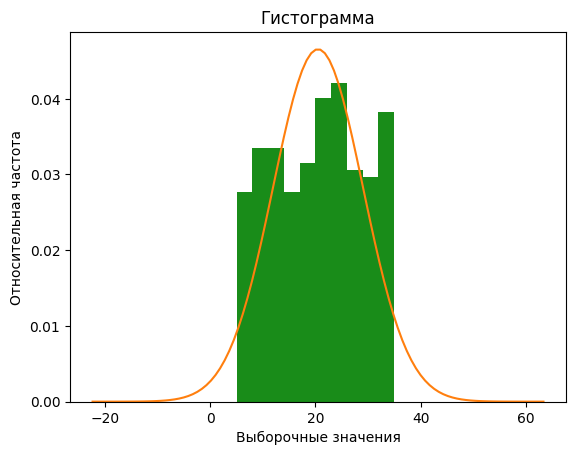

In [25]:
plt.hist(sample4, density = True, facecolor = 'green', alpha = 0.9)
plt.title("Гистограмма")
plt.ylabel("Относительная частота")
plt.xlabel("Выборочные значения")
x = np.linspace(np.mean(sample4) - 5*np.std(sample4), np.mean(sample4) + 5*np.std(sample4), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sample4), np.std(sample4)))

Эмперическая функция плотности не близка к функции плотности нормального распределения. Следовательно, нормальное распределение не подходит для описания исследуемого показателя четвертой генеральной совокупности.

Построим квантильный график.

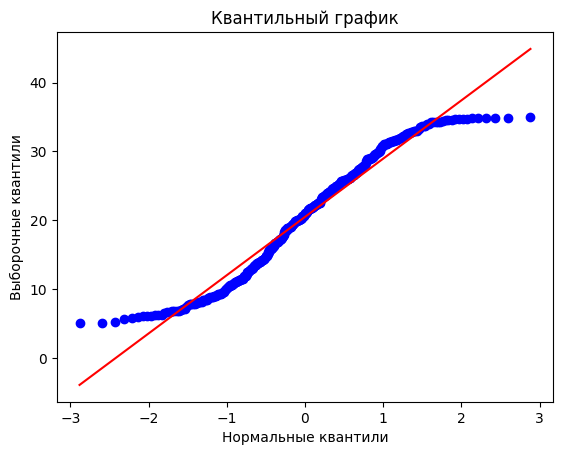

In [26]:
res = stats.probplot(sample4, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Выборочные квантили")
plt.xlabel("Нормальные квантили")
plt.show()

Большая часть выборочных квантилей не совпадает с соответствующими квантилями нормального распределения. Следовательно, нормальное распределение не подходит для описания исследуемого показателя первой генеральной совокупности.

Анализ диаграмм показал, что нормальное распределение не подходит для описания исследуемого показателя четвертой генеральной совокупности.

## Итоги визуализации

Анализ диаграмм и квантильных графиков показал, что для 3 первых выборок нормальное распределение подходит для описания исследуемого показателя, для четвертой выборки, взятой из четвертой генеральной совокупности нормальное распределение не подходит для описания исследуемого показателя генеральной совокупности.

# Использование тестов

Проверим гипотезу о нормальном распределении с помощью тестов Шапиро-Уилка, Колмогорова-Смирнова, Крамера-Майзеса, Харке-Бера и Д'Агостино. Используем, соответственно, функции shapiro, jarque_bera, kstest, cramevonmises и normaltest пакета stats.

## Выборка 1

In [27]:
stats.shapiro(sample1)

ShapiroResult(statistic=0.997124433517456, pvalue=0.7980356812477112)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя первой генеральной совокупности не отвергается.


In [28]:
stats.jarque_bera(sample1)

SignificanceResult(statistic=0.5206333124374246, pvalue=0.7708074661770125)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя первой генеральной совокупности не отвергается.

In [29]:
stats.kstest(sample1, 'norm', (np.mean(sample1), np.std(sample1)))

KstestResult(statistic=0.031776991237391417, pvalue=0.8601450832379742, statistic_location=11.133654475561343, statistic_sign=-1)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя первой генеральной совокупности не отвергается.

In [30]:
stats.cramervonmises(sample1, 'norm', (np.mean(sample1), np.std(sample1)))

CramerVonMisesResult(statistic=0.048367277285106196, pvalue=0.8864213795593925)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя первой генеральной совокупности не отвергается.

In [31]:
stats.normaltest(sample1)

NormaltestResult(statistic=0.6457945830076788, pvalue=0.7240482164525006)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя первой генеральной совокупности не отвергается.

Все тесты показали, что гипотеза о нормальном распределении исследуемого показателя первой генеральной совокупности не отвергается.

## Выборка 2

In [32]:
stats.shapiro(sample2)

ShapiroResult(statistic=0.9961187839508057, pvalue=0.5499145984649658)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя второй генеральной совокупности не отвергается.

In [33]:
stats.jarque_bera(sample2)

SignificanceResult(statistic=2.812145325107981, pvalue=0.24510400150930295)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя второй генеральной совокупности не отвергается.

In [34]:
stats.kstest(sample2, 'norm', (np.mean(sample2), np.std(sample2)))

KstestResult(statistic=0.034148102807858405, pvalue=0.7958853295026875, statistic_location=26.422322940125014, statistic_sign=-1)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя второй генеральной совокупности не отвергается.

In [35]:
stats.cramervonmises(sample2, 'norm', (np.mean(sample2), np.std(sample2)))

CramerVonMisesResult(statistic=0.060452747017794024, pvalue=0.8114515843732855)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя второй генеральной совокупности не отвергается.

In [36]:
stats.normaltest(sample2)

NormaltestResult(statistic=3.6578605419415036, pvalue=0.1605852586402859)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя второй генеральной совокупности не отвергается.

Все тесты показали, что гипотеза о нормальном распределении исследуемого показателя второй генеральной совокупности не отвергается.

## Выборка 3

In [37]:
stats.shapiro(sample3)

ShapiroResult(statistic=0.9983609914779663, pvalue=0.9847660660743713)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя третьей генеральной совокупности не отвергается.

In [38]:
stats.jarque_bera(sample3)

SignificanceResult(statistic=0.1085324712118202, pvalue=0.9471798999155415)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя третьей генеральной совокупности не отвергается.

In [39]:
stats.kstest(sample3, 'norm', (np.mean(sample3), np.std(sample3)))

KstestResult(statistic=0.02718849061582429, pvalue=0.9518665137818222, statistic_location=16.59686409358983, statistic_sign=1)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя третьей генеральной совокупности не отвергается.

In [40]:
stats.cramervonmises(sample3, 'norm', (np.mean(sample3), np.std(sample3)))

CramerVonMisesResult(statistic=0.025924408817155242, pvalue=0.9876723358912499)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя третьей генеральной совокупности не отвергается.

In [41]:
stats.normaltest(sample3)

NormaltestResult(statistic=0.035575444257783445, pvalue=0.9823695455419196)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя третьей генеральной совокупности не отвергается.

Все тесты показали, что гипотеза о нормальном распределении исследуемого показателя третьей генеральной совокупности не отвергается.

## Выборка 4

In [42]:
stats.shapiro(sample4)

ShapiroResult(statistic=0.9576780796051025, pvalue=1.6563589610996132e-08)

Так как p-значение меньше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя четвертой генеральной совокупности отвергается с вероятностью возможной ошибки. равной 0,05.

In [43]:
stats.jarque_bera(sample4)

SignificanceResult(statistic=18.96695552100691, pvalue=7.609882293944405e-05)

Так как p-значение меньше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя четвертой генеральной совокупности отвергается с вероятностью возможной ошибки. равной 0,05.

In [44]:
stats.kstest(sample4, 'norm', (np.mean(sample4), np.std(sample4)))

KstestResult(statistic=0.06697042028694525, pvalue=0.08272114484363402, statistic_location=11.51509140293588, statistic_sign=1)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя четвертой генеральной совокупности не отвергается.

In [45]:
stats.cramervonmises(sample4, 'norm', (np.mean(sample4), np.std(sample4)))

CramerVonMisesResult(statistic=0.44293391586495967, pvalue=0.05572985237751105)

Так как p-значение больше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя четвертой генеральной совокупности не отвергается.

In [46]:
stats.normaltest(sample4)

NormaltestResult(statistic=135.77741506078763, pvalue=3.2832876720441455e-30)

Так как p-значение меньше уровня значимости 0,05, то гипотеза о нормальном распределении исследуемого показателя четвертой генеральной совокупности отвергается с вероятностью возможной ошибки. равной 0,05.

3 теста противоречат выборочным данным. Следовательно, гипотеза о нормальном распределении исследуемого показателя четвертой генеральной совокупности отвергается. 

## Итоги исследования

Анализ диаграмм и тестов показал, что для 3 первых генеральных совокупностей нормальное распределение подходит для описания исследуемого показателя, гипотеза о нормальном распределении для исследуемого показателя не отвергается. Для четвертой генеральной совокупности нормальное распределение не подходит для описания исследуемого показателя, гипотеза о нормальном распределении для исследуемого показателя отвергается.

# Заключение

Цель работы была проверка нормальности распределения исследуемого показателя, определенного на разных генеральных совокупностях.

Были использованы библиотеки: pandas, matplotlib.pyplot, scipy.stats, numpy. Были использованы диаграммы и тесты.

По итогам анализа диаграмм и тестов можно сказать.

Для 3 первых генеральных совокупностей нормальное распределение подходит для описания исследуемого показателя, гипотеза о нормальном распределении для исследуемого показателя не отвергается. Для четвертой генеральной совокупности нормальное распределение не подходит для описания исследуемого показателя, гипотеза о нормальном распределении для исследуемого показателя отвергается.